In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing

## Listwise Deletion

In [ ]:
"../Dataset/Titanic/train.csv"

## Neural Network Model

In [164]:
def LinearFunction(x): return(x)

def scaler(Series) :
    meanVal = np.mean(Series)
    STDVal = np.std(Series)
    return((Series-meanVal)/STDVal)

def ListWiseDeletion(ref):
    TitanicTrain = pd.read_csv(ref)
    DeletingIdx = pd.isna(TitanicTrain.Age)^1

    Age = TitanicTrain.Age[DeletingIdx]
    Fare = TitanicTrain.Fare[DeletingIdx]
    Survived = TitanicTrain.Survived[DeletingIdx]
    
    ScaledDF = pd.DataFrame({'Age' : scaler(Age),
                             'Fare' : scaler(Fare)})
    
    onehotEncoder = preprocessing.OneHotEncoder(sparse=False)
    onehotSurvived = onehotEncoder.fit_transform(np.array(Survived).reshape((-1,1)))
    
    return({'X':ScaledDF, 'Y':onehotSurvived})

def NeuralNet3Layers(activation='relu', epochs = 10000) : 
    
    actFun = {'relu':tf.nn.relu, 'sigmoid':tf.nn.sigmoid, 'linear':LinearFunction}[activation]
    
    X = tf.placeholder(tf.float32, [None, 2])
    Y = tf.placeholder(tf.float32, [None, 2])

    W1 = tf.Variable( tf.random_normal([2,128]) )
    b1 = tf.Variable( tf.random_normal([128]))
    L1 = actFun( tf.matmul(X, W1) + b1 )

    W2 = tf.Variable( tf.random_normal([128,64]) )
    b2 = tf.Variable( tf.random_normal([64]))
    L2 = actFun( tf.matmul(L1, W2) + b2 )

    W3 = tf.Variable( tf.random_normal([64,2]) )
    Model = tf.matmul(L2, W3)

    Cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Model, labels=Y))
    Adam = tf.train.AdamOptimizer(0.01)

    Trainer = Adam.minimize(Cost)
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    CostTrace = []
    for epoch in range(epochs):

        _, cost_val = sess.run([ Trainer, Cost ], feed_dict={X: ScaledDF,
                                                             Y: onehotSurvived} )

        CostTrace.append(cost_val)
        if epochs % 1000 == 0 :
            print("1000 additional epochs completed, Cost:{}".format(cost_val))
        
    IsCorrect = tf.equal(tf.argmax(Model, 1), tf.argmax(Y, 1))
    Accuracy = tf.reduce_mean(tf.cast(IsCorrect, tf.float32))
    print ("Learning Completed, Accuracy:{}".format(sess.run(Accuracy, feed_dict = {X: ScaledDF, Y: onehotSurvived }) ) )
    return(CostTrace)

0.78571427

In [167]:
plt.plot(CostTrace, 'r')
plt.xlabel('Epoch')
plt.ylabel('CrossEntropy')
plt.savefig('Classification.png')

plt.plot(t, a, 'r') # plotting t, a separately 
plt.plot(t, b, 'b') # plotting t, b separately 
plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [168]:
W1Trained = sess.run(W1)
W2Trained = sess.run(W2)
W3Trained = sess.run(W3)

b1Trained = sess.run(b1)
b2Trained = sess.run(b2)

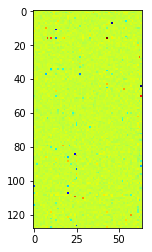

In [175]:
plt.imshow(W2Trained, cmap=plt.cm.jet, interpolation='nearest')
plt.show()

In [ ]:
AgeMean = np.mean(Age)
AgeSTD  = np.std(Age)
FareMean = np.mean(Fare)
FareSTD = np.std(Fare)

In [177]:
x = np.linspace(start=0, stop=80, num=200)
y = np.linspace(start=0, stop=512, num=200)
xx, yy = np.meshgrid(x, y)

Grid = pd.DataFrame({'x' : (xx.flatten()-AgeMean)/AgeSTD,
                     'y' : (yy.flatten()-FareMean)/FareSTD})

In [178]:
Res = sess.run(tf.nn.softmax(Model), feed_dict={X: Grid})

In [187]:
np.savetxt("ModelPrediction.csv", np.reshape(Res[:,1], (200,200)), delimiter=",")

## Linear Regression Model

## Logistic Regression Model

In [ ]:
0.78571427
